In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
eu = pd.read_csv('../input/eurusd-daily/eu.csv', index_col=0, parse_dates=True, skipinitialspace=True)
eu.drop('date', axis='columns', inplace=True)
eu.head()

,open,high,low,close,volume
1971-01-04,0.5369,0.5369,0.5369,0.5369,1
1971-01-05,0.5366,0.5366,0.5366,0.5366,1
1971-01-06,0.5365,0.5365,0.5365,0.5365,1
1971-01-07,0.5368,0.5368,0.5368,0.5368,1
1971-01-08,0.5371,0.5371,0.5371,0.5371,1


In [3]:
eu.tail()

,open,high,low,close,volume
2019-05-01,1.12148,1.12644,1.11867,1.11941,52561
2019-05-02,1.11942,1.12187,1.11703,1.11709,59203
2019-05-03,1.11710,1.13236,1.11346,1.13234,62828
2019-05-08,1.11922,1.11927,1.11892,1.11920,698
2019-05-09,1.11902,1.11985,1.11860,1.11903,12844


In [4]:
eu.shape, eu.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12115 entries, 1971-01-04 to 2019-05-09
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    12115 non-null  float64
 1   high    12115 non-null  float64
 2   low     12115 non-null  float64
 3   close   12115 non-null  float64
 4   volume  12115 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 567.9 KB


((12115, 5), None)

In [5]:
eu.isna().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [6]:
eu.describe()

,open,high,low,close,volume
count,12115.000000,12115.000000,12115.000000,12115.000000,12115.000000
mean,1.072829,1.076753,1.068981,1.072871,20323.133884
std,0.234412,0.236481,0.232351,0.234409,37538.102171
min,0.536500,0.536500,0.536500,0.536500,1.000000
25%,0.878950,0.881650,0.875400,0.878700,231.000000
50%,1.110700,1.115000,1.107070,1.111100,1891.000000
75%,1.257600,1.263790,1.251900,1.257600,11863.000000
max,1.599500,1.603800,1.586600,1.599700,308716.000000


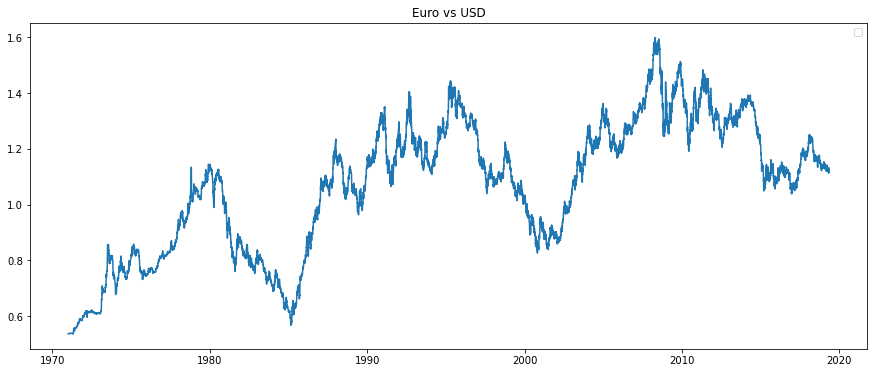

In [7]:
plt.figure(figsize=(15,6))
plt.plot(eu.close)
plt.title('Euro vs USD')
plt.legend()
plt.show()

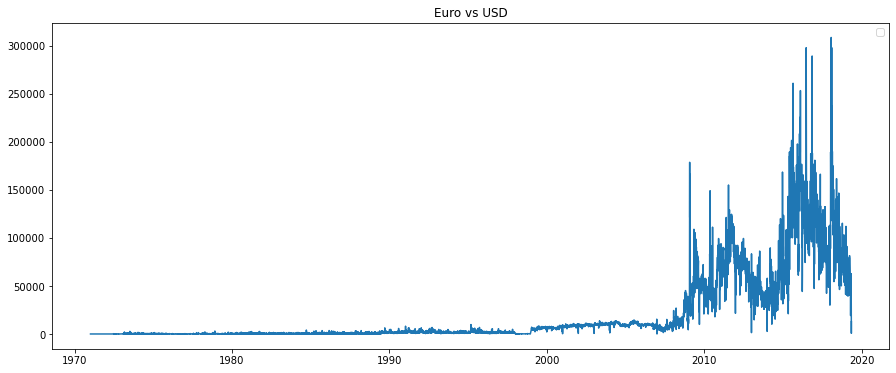

In [8]:
plt.figure(figsize=(15,6))
plt.plot(eu.volume)
plt.title('Euro vs USD')
plt.legend()
plt.show()

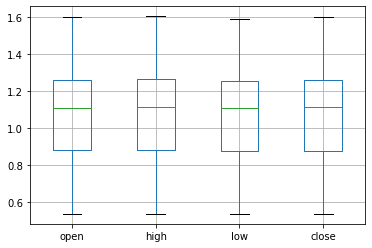

In [9]:
#box plot for open, high, low , close
eu.drop('volume', axis=1).boxplot()

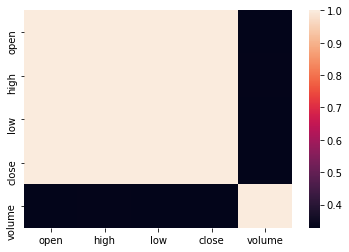

In [10]:
sns.heatmap(eu.corr())

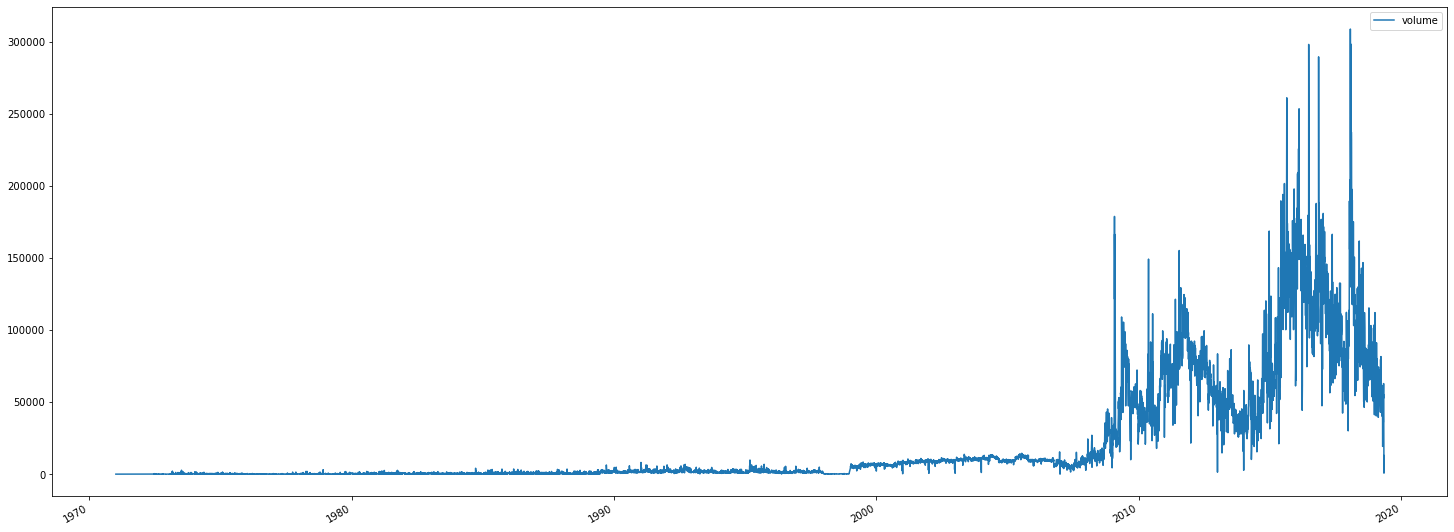

In [11]:
eu.plot(y=['volume'],figsize=(25,10))

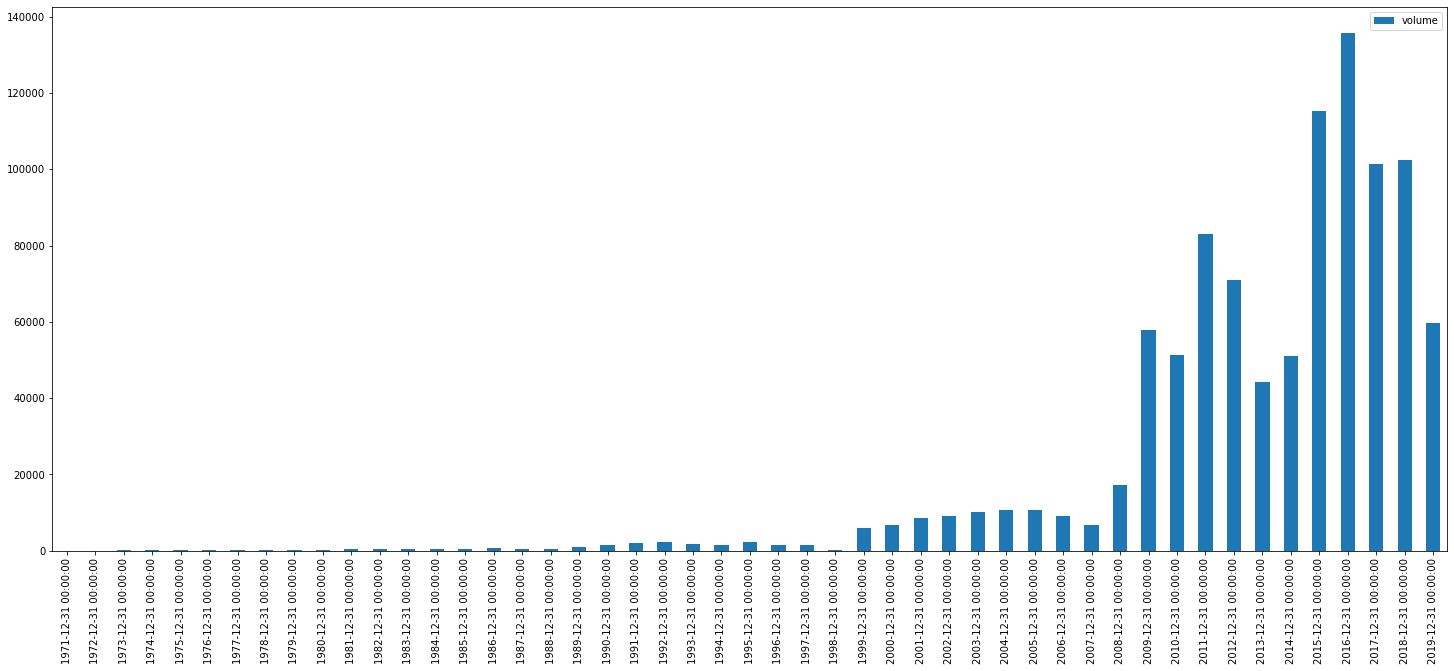

In [12]:
eu.resample('Y').mean().plot.bar(y=['volume'], figsize=[25,10])

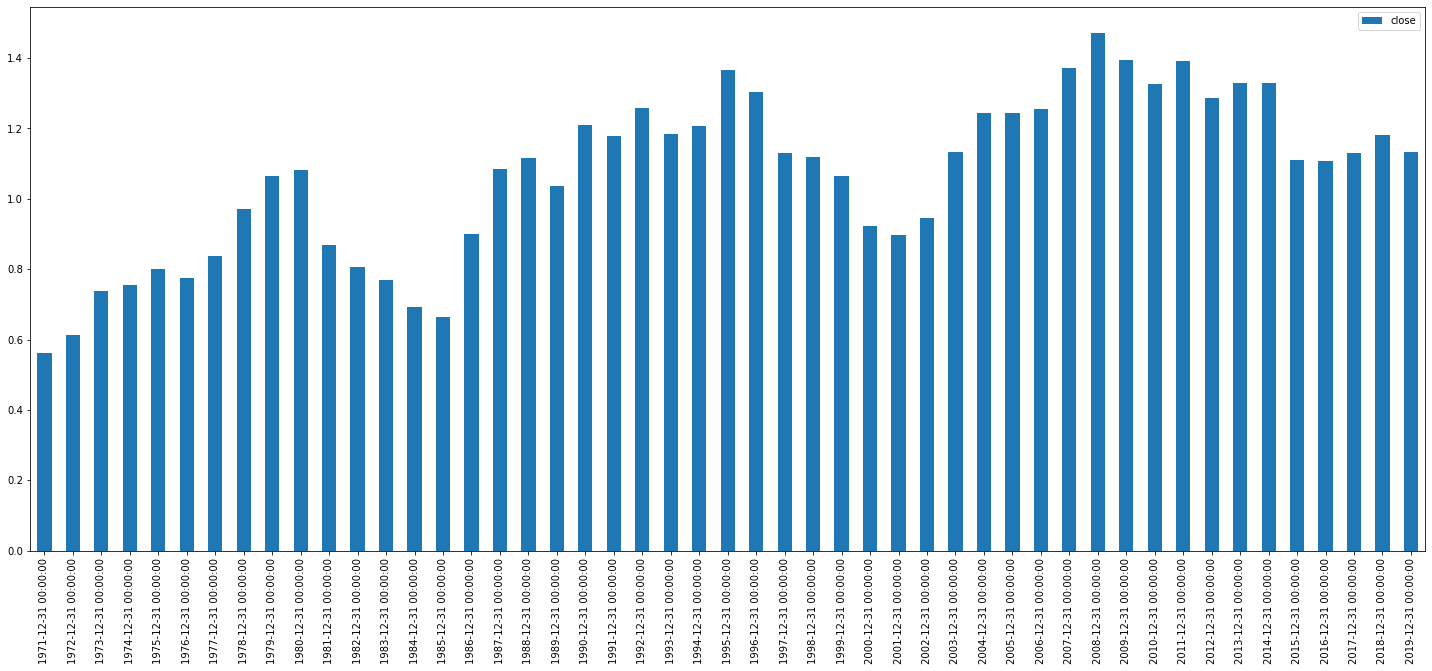

In [13]:
eu.resample('Y').mean().plot.bar(y=['close'], figsize=[25,10])

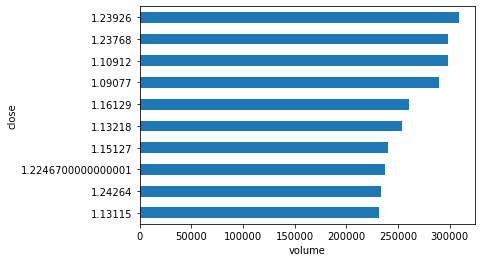

In [14]:
ax = eu.groupby(['close'])['volume'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("volume");

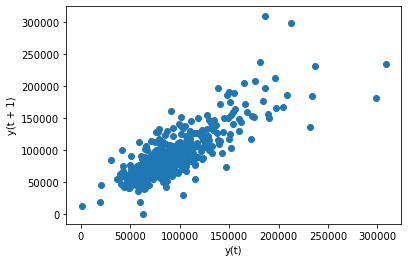

In [15]:
from pandas.plotting import lag_plot

lag_plot(eu['volume'].tail(500))

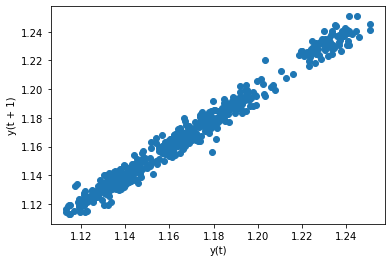

In [16]:
from pandas.plotting import lag_plot

lag_plot(eu['close'].tail(500))

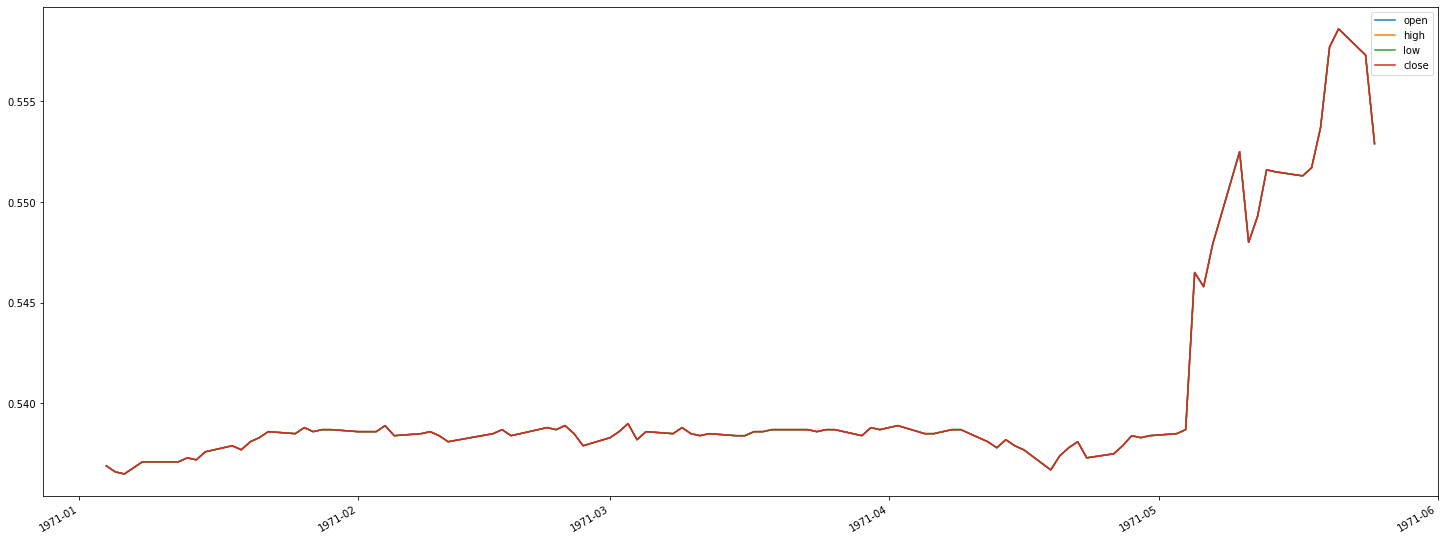

In [17]:
eu.iloc[:100].plot(y=['open', 'high', 'low', 'close'], figsize=(25,10))

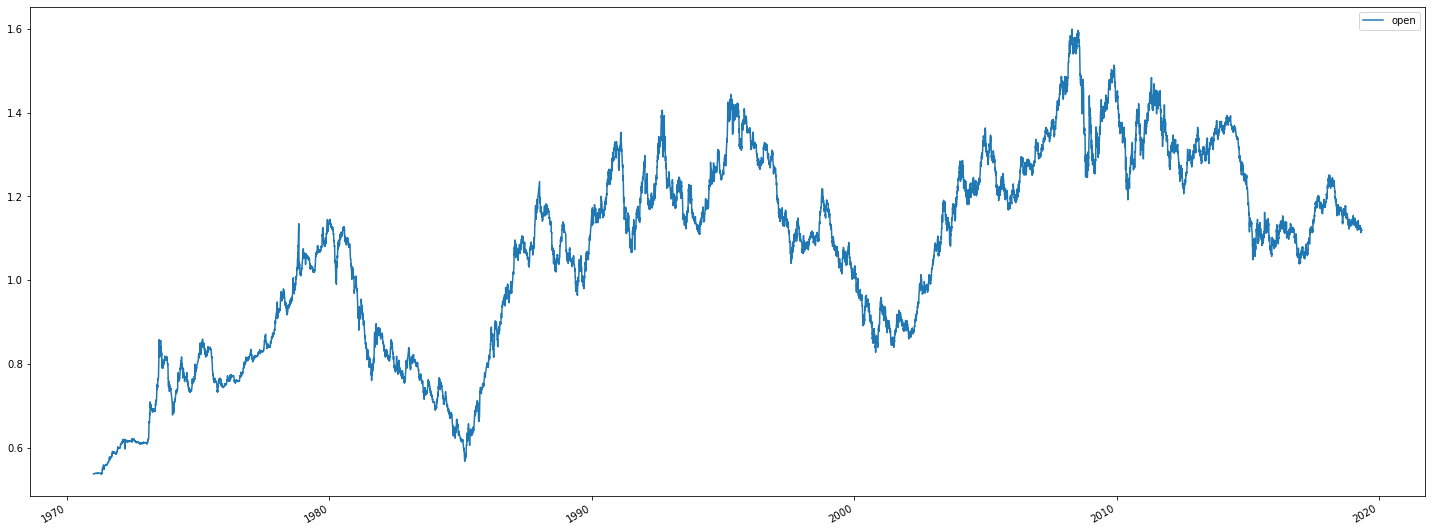

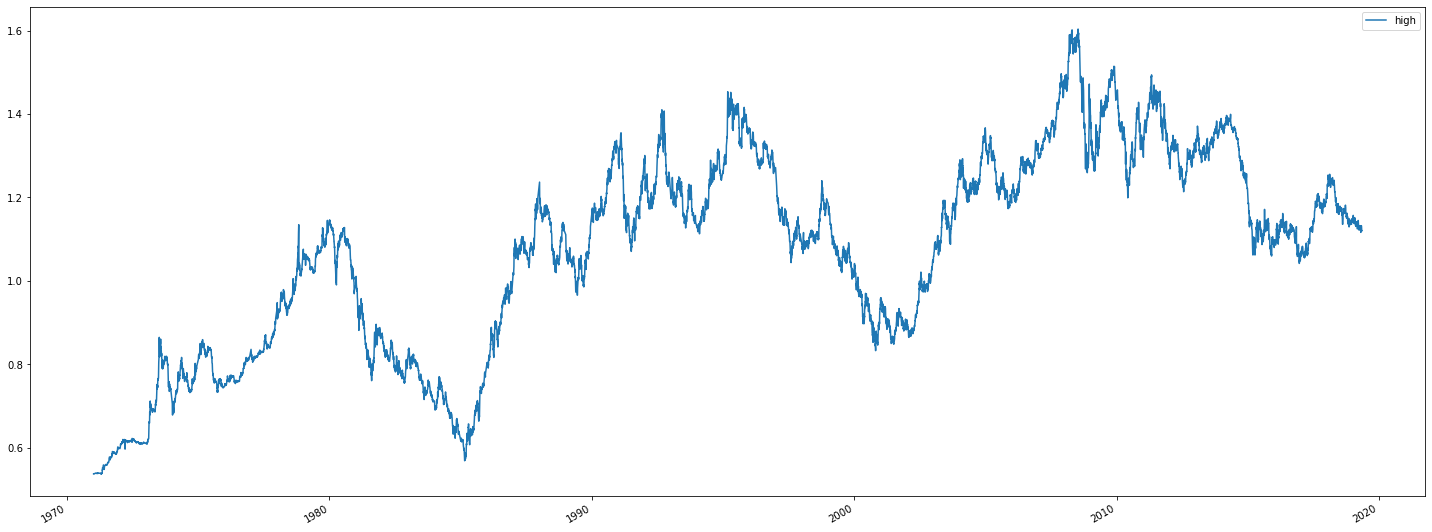

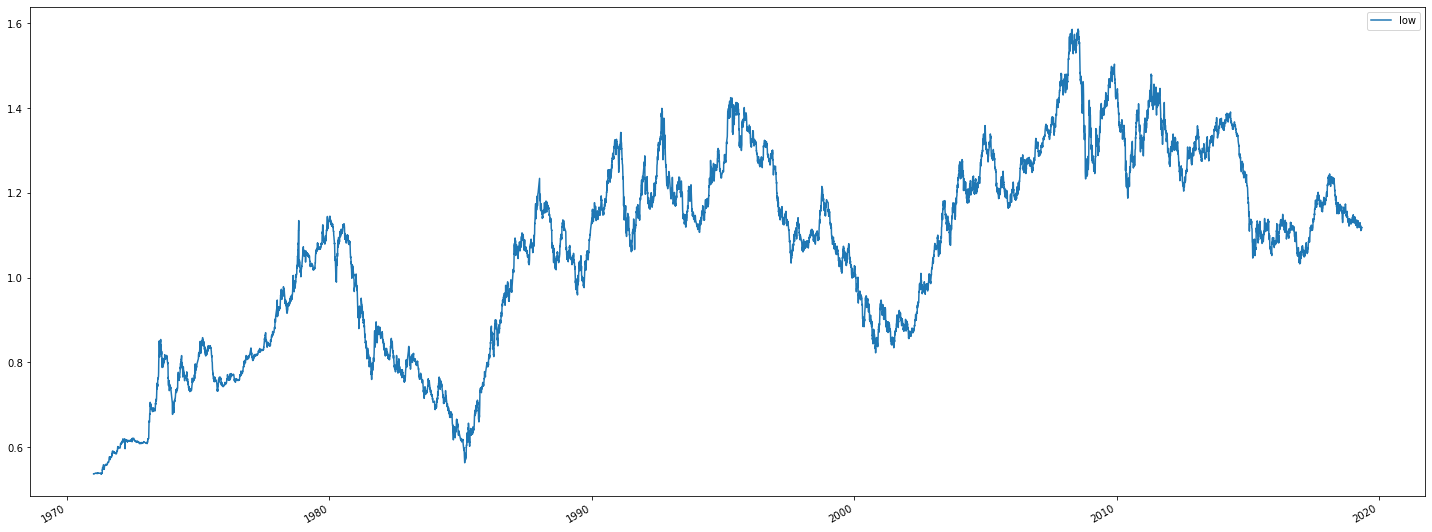

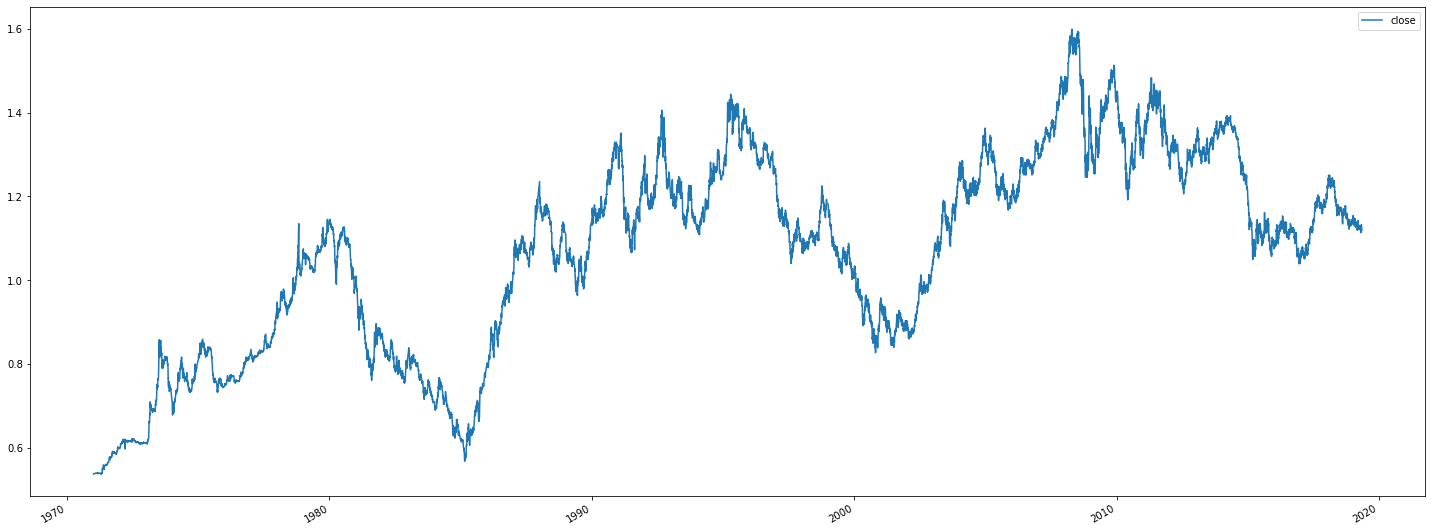

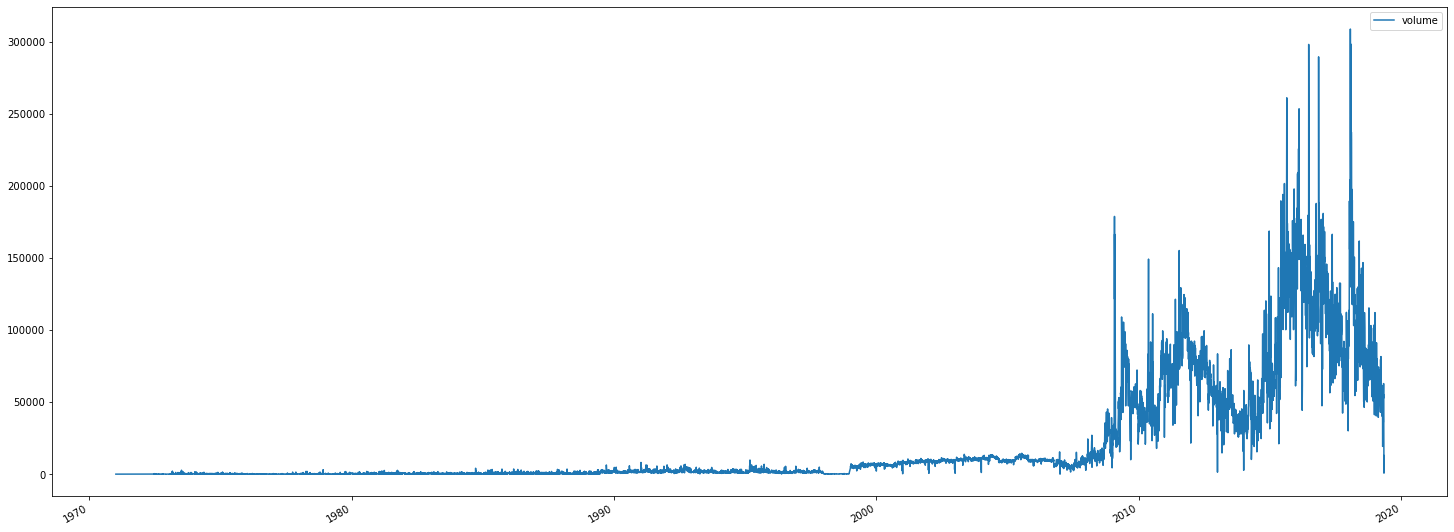

In [18]:
for itr in eu.columns:
    eu.plot(y=[itr], figsize=(25,10))